In [105]:
# dependencies
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [106]:
#import csv
df = pd.read_csv("total_store_fixed_counties.csv")
df.count()

Store Name    279
Lat           279
Lng           279
Address       279
Place ID      279
County        279
dtype: int64

In [107]:
# Create df with only Heinen's stores to identify different names
heinens_df = df[df['Store Name'].str.match('Heinen') == True]
heinens_df

,Store Name,Lat,Lng,Address,Place ID,County
256,Heinen's Grocery Store,41.242519,-81.441967,"19 Clinton St, Hudson",ChIJJTT3MXYhMYgR4mX4VgBkV9Q,Summit County
257,Heinen's Grocery Store,41.339444,-81.438333,"10049 Darrow Rd, Twinsburg",ChIJ18wjhcgeMYgRgms0NTSY8ps,Summit County
258,Heinen's Grocery Store,41.320194,-81.346876,"115 N Chillicothe Rd, Aurora",ChIJaYZXy9YZMYgR4lpP-S-67pw,Portage County
259,Heinen's Grocery Store,41.321169,-81.623725,"8383 Chippewa Rd, Brecksville",ChIJ53rsdD7nMIgRpj3XKmsHfIo,Cuyahoga County
261,Heinen's Grocery Store,41.465294,-81.563635,"16611 Chagrin Blvd, Shaker Heights",ChIJx58pP9n8MIgRlRbvHFSgBq0,Cuyahoga County
262,Heinen's Grocery Store,41.370341,-81.804763,"Heinen's of, 15300 Bagley Rd, Middleburg Heights",ChIJffwt-ZXrMIgRSjLx6Ltz8oo,Cuyahoga County
263,Heinen's Grocery Store,41.413401,-81.338803,"8482 E Washington St, Chagrin Falls",ChIJsT7GQ3UQMYgRsLWagx1zIH4,Geauga County
264,Heinen's Grocery Store,41.500369,-81.519878,"2180 S Green Rd, Cleveland",ChIJw-qZH4n9MIgRxtsshBa67wM,Cuyahoga County
265,Heinen's Grocery Store,41.431116,-81.389559,"Chagrin Falls 20 Shopping, Center St, Chagrin ...",ChIJXyhw0y4bMYgRcAqlgqQxn0c,Cuyahoga County
266,Heinen's Grocery Store,41.315592,-81.829797,"18300 Royalton Rd, Strongsville",ChIJEwr-9YPqMIgRLkT8aP6Y1q4,Cuyahoga County


In [108]:
# Remove bad data
df.drop([273,274], inplace=True, axis='rows')
print(df)

Store Name        Lat        Lng  \
0          Costco Wholesale  41.265324 -81.507401   
1          Costco Wholesale  41.316908 -81.815903   
2          Costco Wholesale  41.460533 -82.011002   
3          Costco Wholesale  41.523955 -81.446610   
4                Sam's Club  40.878174 -81.437164   
..                      ...        ...        ...   
272  Heinen's Grocery Store  41.483650 -81.922109   
275        Heinen's grocery  41.399263 -81.334441   
276  Heinen's Grocery Store  41.588116 -81.218803   
277  Heinen's Grocery Store  41.606722 -81.442266   
278  Heinen's Grocery Store  41.672847 -81.323319   

                              Address                     Place ID  \
0            6720 Bass Pro Dr, Hudson  ChIJrwEsWXIgMYgRnko93meT4s0   
1     16690 Royalton Rd, Strongsville  ChIJNa2MJXnqMIgRmZ164eouXjE   
2              35804 Detroit Rd, Avon  ChIJSZghHbmRMIgRfCrrH_q0OJI   
3    1409 Golden Gate Blvd, Cleveland  ChIJz_ruA18BMYgRY7HfgmroTWg   
4          4790 Portage St NW,

In [109]:
# Rename all Heinen's stores to a common name
df = df.replace({"Heinen's Grocery Store": "Heinen's", "Heinen's of Downtown Cleveland": "Heinen's", "Heinen's grocery": "Heinen's", "The Tasting Room Bistro at Heinen's of Chagrin Falls": "Heinen's"})
df.tail(10)

,Store Name,Lat,Lng,Address,Place ID,County
267,Heinen's,41.463166,-81.459992,"30849 Pinetree Rd, Pepper Pike",ChIJl9k2EGgDMYgRTAgSTzay5Y0,Cuyahoga County
268,Heinen's,41.500037,-81.686112,"900 Euclid Ave, Cleveland",ChIJDXu8A376MIgRfzR8vMBn-QE,Cuyahoga County
269,Heinen's,41.481684,-81.834753,"19219 Detroit Rd, Rocky River",ChIJi-tWP5DyMIgRHzxPPNHYj6Q,Cuyahoga County
270,Heinen's,41.537752,-81.440157,"860 Som Center Road, Mayfield, Village, Mayfie...",ChIJdacIPkYBMYgRCczjbsaO5Uk,Cuyahoga County
271,Heinen's,41.460235,-82.017595,"35980 Detroit Rd, Avon",ChIJ29keBmqQMIgRRIMMBZo5DuY,Lorain County
272,Heinen's,41.483650,-81.922109,"434 Dover Center Rd, Bay Village",ChIJZb-nbY-NMIgRjlcsO5fKsu8,Cuyahoga County
275,Heinen's,41.399263,-81.334441,Bainbridge,ChIJNzAZpH4RMYgR59YHZlk6Z8g,Cuyahoga County
276,Heinen's,41.588116,-81.218803,"402 Center St, Chardon",ChIJ1QMvToOgMYgRsd-40CDvvWA,Geauga County
277,Heinen's,41.606722,-81.442266,"34501 Ridge Rd, Willoughby",ChIJz34dxQ6qMYgRad3XD53J_KA,Lake County
278,Heinen's,41.672847,-81.323319,"8850 Mentor Ave, Mentor",ChIJMeVS0uOlMYgRJ6pIM5WtpH8,Lake County


In [110]:
# Create df with only Dave's stores
daves_df = df[df['Store Name'].str.match('Dave') == True]
daves_df

,Store Name,Lat,Lng,Address,Place ID,County
242,Dave's Markets Middlebury Market,41.071278,-81.493202,"871 E Exchange St, Akron",ChIJ4RZhTb8pMYgRnTCUyhZg4Ms,Summit County
243,Dave's Supermarket,41.483130,-81.590893,"13130 Shaker Square, Cleveland",ChIJyUNp4I_8MIgR1WZZPYKSfQ4,Cuyahoga County
244,Dave's Markets Ohio City,41.485025,-81.705783,"2700 Carroll Ave, Cleveland",ChIJuzHTQGzwMIgRDHoZZepY1G0,Cuyahoga County
245,Dave's Mercado,41.459452,-81.737391,"3565 Ridge Rd, Cleveland",ChIJPRnHoivuMIgR9sxAm9oKuu8,Cuyahoga County
246,Dave's Markets Slavic Village,41.448600,-81.635281,"7422 Harvard Ave, Cleveland",ChIJHfmkt8_kMIgRdYYHFyg09q8,Cuyahoga County
247,Dave's Markets Turneytown,41.424537,-81.613641,"4948 Turney Rd, Garfield Heights",ChIJdfUXw5rkMIgR4AkN98DR--E,Cuyahoga County
248,Dave's Markets Harvard & Lee,41.448071,-81.562578,"16820 Harvard Ave, Cleveland",ChIJpZcqUyrjMIgRO0h587V7wLs,Cuyahoga County
249,Dave's Markets Corporate Headquarters,41.417009,-81.500903,"5300 Richmond Rd, Bedford",ChIJmccEg5kdMYgR0tKybt9jc0M,Cuyahoga County
250,Dave's Markets Wilson Mills,41.538215,-81.496401,"5100 Wilson Mills Rd, Richmond Heights",ChIJBfWgW-wBMYgRIF9pEnshn0Y,Cuyahoga County
251,Dave's Markets Cedar Hill,41.500954,-81.593140,"12438 Cedar Rd, Cleveland Heights",ChIJEeeg0Xr8MIgRDfuurNJkdrk,Cuyahoga County


In [111]:
# Remove bad data
df.drop([249], inplace=True, axis='rows')

In [112]:
# Rename all Dave's stores to a common name
df = df.replace({"Dave's Markets Middlebury Market": "Dave's Markets", "Dave's Supermarket": "Dave's Markets", "Dave's Markets Ohio City": "Dave's Markets", "Dave's Mercado": "Dave's Markets","Dave's Markets Slavic Village": "Dave's Markets", "Dave's Markets Turneytown": "Dave's Markets", "Dave's Markets Harvard & Lee": "Dave's Markets","Dave's Markets Wilson Mills": "Dave's Markets", "Dave's Markets Cedar Hill": "Dave's Markets", "Dave's Markets Severance": "Dave's Markets", "Dave's Markets Euclid Beach": "Dave's Markets", "Dave's Markets Shore Center": "Dave's Markets", "Dave's Market & eatery": "Dave's Markets"})

In [113]:
# Create df with only Walmart stores
walmart_df = df[df['Store Name'].str.match('Wal') == True]
walmart_df

,Store Name,Lat,Lng,Address,Place ID,County
29,Walmart Supercenter,41.165890,-81.480013,"3520 Hudson Dr, Stow",ChIJZ-vS1KknMYgRFeF3mAX3Wcs,Summit County
30,Walmart Supercenter,41.098492,-81.384385,"250 Tallmadge Rd, Kent",ChIJ_4OGF58vMYgR1MZBZf907h0,Portage County
31,Walmart,41.135370,-81.632149,"3750 W Market St, Fairlawn",ChIJecKBe5zQMIgRb4r9N1FH1DQ,Summit County
32,Walmart Supercenter,40.993039,-81.489007,"2887 S Arlington Rd, Akron",ChIJkS50luwqMYgRj9C384PYJEc,Summit County
33,Walmart Supercenter,41.156854,-81.299629,"2600 OH-59, Ravenna",ChIJdV72JQc7MYgR1d6qv2TxUpE,Portage County
34,Walmart Supercenter,41.253213,-81.362409,"905 Singletary Dr, Streetsboro",ChIJefrPEcIiMYgRR1gsACuygh0,Portage County
35,Walmart Supercenter,41.051813,-81.725531,"222 Smokerise Dr, Wadsworth",ChIJM2v5uM_NMIgREm8zqw2f5Ec,Medina County
36,Walmart Supercenter,41.310135,-81.519020,"8160 Macedonia Commons Blvd, Macedonia",ChIJkxM-tdgfMYgR1FrZnzT95XU,Summit County
37,Walmart,40.871426,-81.432706,"4572 Mega St NW, North Canton",ChIJC0AVG7LWNogRYbaTEnh_4jc,Stark County
38,Walmart Supercenter,41.350216,-81.389511,"7235 Market Pl Dr, Bainbridge Township",ChIJiReliXkZMYgRNq_SiQZTqgI,Geauga County


In [114]:
# Remove bad data
df.drop([56,57,58], inplace=True, axis='rows')

In [115]:
# Rename all Walmart stores to a common name
df = df.replace({"Walmart Supercenter": "Walmart"})

In [116]:
# Create df with only Giant Eagle stores
ge_df = df[df['Store Name'].str.match('Giant') == True]
ge_df

,Store Name,Lat,Lng,Address,Place ID,County
64,Giant Eagle Supermarket,41.117306,-81.483442,"230 Howe Ave, Cuyahoga Falls",ChIJgxgmk3ooMYgRHcQg08qb58c,Summit County
65,Giant Eagle Supermarket,41.100002,-81.449940,"205 West Ave, Tallmadge",ChIJMXBXfuooMYgRZTMR-DCmW3s,Summit County
66,Giant Eagle Supermarket,41.202155,-81.433934,"1700 Norton Rd, Stow",ChIJeTuopawmMYgR6lJZoj21CRQ,Summit County
67,Giant Eagle Supermarket,41.153009,-81.408420,"4300 Kent Road, State Rd #59, Stow",ChIJXwfEDMolMYgR0gqDrBTMNPE,Summit County
68,Giant Eagle Supermarket,41.027518,-81.509397,"484 E Waterloo Rd, Akron",ChIJDQwLUXMqMYgRyo_DZmYqkcI,Summit County
69,Giant Eagle Supermarket,41.032131,-81.426042,"2801 E Waterloo Rd, Akron",ChIJoZ3d4QcsMYgRxrK1WYC1Uro,Summit County
70,Giant Eagle Market District,40.962323,-81.468996,"1700 Corporate Woods Pkwy, Uniontown",ChIJ36zJU9TUNogRD4o_C2Q43bw,Summit County
71,Giant Eagle Supermarket,41.126281,-81.602143,"2775 W Market St, Fairlawn",ChIJLZj3vVLXMIgR40LCO1zoK9w,Summit County
72,Giant Eagle Supermarket,41.009167,-81.587222,"41 5th St SE, Barberton",ChIJUZun1YjUMIgR09UuMeAjhHc,Summit County
73,Giant Eagle Supermarket,41.132943,-81.635956,"3750 W Market St, Akron",ChIJecKBe5zQMIgRath1hyzy010,Summit County


In [117]:
# Remove bad data
df.drop([75,77,112], inplace=True, axis='rows')

In [118]:
# Rename all Giant Eagle stores to a common name
# Rename Berry's & Whole Foods to shorter names to show up well on chart
df = df.replace({"Giant Eagle Market District": "Giant Eagle", "Giant Eagle Supermarket": "Giant Eagle","Berry's Natural Food Market": "Berry's","Whole Foods Market":"Whole Foods"})

df.sample(20)

,Store Name,Lat,Lng,Address,Place ID,County
10,Sam's Club,41.034330,-80.633600,"6361 South Ave, Youngstown",ChIJkW7Vup36M4gRgrjjdp3j20U,Mahoning County
264,Heinen's,41.500369,-81.519878,"2180 S Green Rd, Cleveland",ChIJw-qZH4n9MIgRxtsshBa67wM,Cuyahoga County
95,Giant Eagle,41.583533,-81.218232,"351 Center St, Chardon",ChIJV09pEngKMYgRWSoRaM7Epy0,Geauga County
13,BJ's Wholesale,41.441952,-81.496956,"4365 Richmond Rd, Warrensville Heights",ChIJlxu-3EsdMYgRQNm9xU4cwUM,Cuyahoga County
1,Costco Wholesale,41.316908,-81.815903,"16690 Royalton Rd, Strongsville",ChIJNa2MJXnqMIgRmZ164eouXjE,Cuyahoga County
74,Giant Eagle,41.237373,-81.347279,"1280 OH-303, Streetsboro",ChIJndaDbNciMYgRSbTi-SbTmlc,Portage County
150,ALDI,41.098706,-80.772243,"5863 Mahoning Ave, Austintown",ChIJh7WIieTiM4gR9JgdSCU_wW4,Mahoning County
6,Sam's Club,41.420280,-81.757481,"10250 Brookpark Rd, Cleveland",ChIJ1fa4rIzuMIgRFMsgyqQYFWE,Cuyahoga County
152,ALDI,41.145275,-80.663696,"3497 Belmont Ave, Youngstown",ChIJM0eNenfmM4gR3Vvd5W7xqjo,Trumbull County
183,Marc's Stores,41.585136,-81.482576,"28121 Chardon Rd, Willoughby Hills",ChIJX7IEtEIAMYgRHNmBQzdlzsE,Lake County


In [119]:
# Create df with only Marc's stores
marcs_df = df[df['Store Name'].str.match('Marc') == True]
marcs_df
#All clean

,Store Name,Lat,Lng,Address,Place ID,County
160,Marc's Stores,41.116686,-81.478218,"470 Howe Ave, Cuyahoga Falls",ChIJ6c_6sXsoMYgRyVebu0bib1Y,Summit County
161,Marc's Stores,41.150561,-81.510638,"2900 State Rd, Cuyahoga Falls",ChIJXy6_f4wnMYgRZ39wZSp3URs,Summit County
162,Marc's Stores,41.165723,-81.441433,"3732 Darrow Rd, Stow",ChIJsREC8YgmMYgRaiTIqzbloMg,Summit County
163,Marc's Stores,41.027469,-81.513556,"360 E Waterloo Rd #426, Akron",ChIJY-UqKQsqMYgRdI_ZOCqKsxY,Summit County
164,Marc's Stores,41.136667,-81.357128,"1600 S Water St, Kent",ChIJXUy2pEAlMYgR92dofXwJQQg,Portage County
165,Marc's Stores,41.032214,-81.423852,"2891 E Waterloo Rd, Akron",ChIJQwJ4X9YzMYgRJQeI4zoro60,Summit County
166,Marc's Stores,41.125772,-81.602421,"2753 W Market St, Fairlawn",ChIJk4RlvE3XMIgRb8uNkkFsagc,Summit County
167,Marc's Stores,40.966719,-81.347488,"900 W Maple St, Hartville",ChIJ43QYTlotMYgRVjN_d4ZYrz8,Lake County
168,Marc's Stores,41.158398,-81.224700,"1145 E Main St, Ravenna",ChIJM_Rk-RE5MYgRJCC9kaccrg4,Portage County
169,Marc's Stores,41.313253,-81.558146,"550 W Aurora Rd, Northfield",ChIJ-2-col_gMIgRqQ1WpsHi-sI,Summit County


In [120]:
# Create df with only Whole Foods stores
wf_df = df[df['Store Name'].str.match('Whole') == True]
wf_df

,Store Name,Lat,Lng,Address,Place ID,County
154,Whole Foods Market 365,41.110908,-81.571164,"1745 W Market St, Akron",ChIJB3vkhhLXMIgR9x9lR-du8Rs,Summit County
155,Whole Foods,41.449988,-81.485072,"50 Wall St, Orange",ChIJCwJfWF4DMYgRar7qW8_69zQ,Cuyahoga County
156,Whole Foods,41.500876,-81.536858,"13998 Cedar Rd, University Heights",ChIJn5sk0Jf9MIgRcQE1rMMcP1E,Cuyahoga County
157,Whole Foods,41.478747,-81.839641,"19607 Detroit Rd, Rocky River",ChIJAbAH8pnyMIgRd9si0bIe7Eo,Cuyahoga County
158,Whole Foods,41.463355,-81.486312,"27249 Chagrin Blvd, Woodmere",ChIJqXFgScICMYgRidxw8YLBJiM,Cuyahoga County


In [121]:
# Rename all Whole Foods stores to a common name
df = df.replace({"Whole Foods Market 365": "Whole Foods"})

In [122]:
# Create df with only Costco stores
costco_df = df[df['Store Name'].str.match('Costco') == True]
costco_df
#All clean

,Store Name,Lat,Lng,Address,Place ID,County
0,Costco Wholesale,41.265324,-81.507401,"6720 Bass Pro Dr, Hudson",ChIJrwEsWXIgMYgRnko93meT4s0,Summit County
1,Costco Wholesale,41.316908,-81.815903,"16690 Royalton Rd, Strongsville",ChIJNa2MJXnqMIgRmZ164eouXjE,Cuyahoga County
2,Costco Wholesale,41.460533,-82.011002,"35804 Detroit Rd, Avon",ChIJSZghHbmRMIgRfCrrH_q0OJI,Lorain County
3,Costco Wholesale,41.523955,-81.446610,"1409 Golden Gate Blvd, Cleveland",ChIJz_ruA18BMYgRY7HfgmroTWg,Cuyahoga County


In [123]:
# Create df with only Sam's Club stores
sams_df = df[df['Store Name'].str.match('Sam') == True]
sams_df
#All clean

,Store Name,Lat,Lng,Address,Place ID,County
4,Sam's Club,40.878174,-81.437164,"4790 Portage St NW, Canton",ChIJ2Yr2wKjWNogRjGilwuTNZyU,Mahoning County
5,Sam's Club,41.366413,-81.512382,"23300 Broadway Ave, Oakwood",ChIJDV-HRwceMYgRIYsH9N1b_HQ,Cuyahoga County
6,Sam's Club,41.420280,-81.757481,"10250 Brookpark Rd, Cleveland",ChIJ1fa4rIzuMIgRFMsgyqQYFWE,Cuyahoga County
7,Sam's Club,41.421844,-82.081514,"5225 Cobblestone Rd, Sheffield",ChIJX_t1UjKaMIgRHM2sNhFFxyU,Lorain County
8,Sam's Club,41.226195,-80.744836,"1040 Niles Cortland Rd SE, Warren",ChIJaY-CnZ_gM4gRng6y-UmPoRY,Ashtabula County
9,Sam's Club,41.717211,-81.293395,"5600 Emerald Ct, Mentor",ChIJ0Ux7Jf2kMYgRF3vi1W6CpKg,Lake County
10,Sam's Club,41.034330,-80.633600,"6361 South Ave, Youngstown",ChIJkW7Vup36M4gRgrjjdp3j20U,Mahoning County


In [124]:
# Create df with only BJ's Wholesale stores
bjs_df = df[df['Store Name'].str.match('BJ') == True]
bjs_df
#All clean

,Store Name,Lat,Lng,Address,Place ID,County
11,BJ's Wholesale,41.115934,-81.482591,"1677 Home Ave, Akron",ChIJr1lVVGUoMYgRZyNHvaFakyk,Summit County
12,BJ's Wholesale,40.881690,-81.439936,"6924 Frank Ave NW, North Canton",ChIJv7wm5qfWNogR-pHBWCbJJ4Y,Stark County
13,BJ's Wholesale,41.441952,-81.496956,"4365 Richmond Rd, Warrensville Heights",ChIJlxu-3EsdMYgRQNm9xU4cwUM,Cuyahoga County
14,BJ's Wholesale,41.376131,-81.786051,"6944 W 130th St, Middleburg Heights",ChIJd7jukOTrMIgRbFLNX469JvM,Cuyahoga County
15,BJ's Wholesale,41.463206,-82.050078,"38292 Colorado Ave, Avon",ChIJ_VAprpmaMIgRdiXIOGEAp6w,Lorain County
16,BJ's Wholesale,41.631042,-81.426055,"36595 Euclid Ave, Willoughby",ChIJs99FxoepMYgRDybNRcg4FRU,Lake County


In [125]:
#Check that all stores were combined into common names
df['Store Name'].value_counts()

Save A Lot          47
Giant Eagle         46
ALDI                41
Marc's Stores       35
Walmart             31
Heinen's            21
Dave's Markets      13
Target              12
Sam's Club           7
BJ's Wholesale       6
Whole Foods          5
Costco Wholesale     4
Berry's              1
ATM Wal-mart         1
Name: Store Name, dtype: int64

In [126]:
#Delete ATM Wal-mart row
atm_df = df[df['Store Name'].str.match('ATM') == True]
atm_df

,Store Name,Lat,Lng,Address,Place ID,County
63,ATM Wal-mart,41.097458,-80.774038,"6001 Mahoning Ave, Youngstown",ChIJawP-7OTiM4gR7TWrwQDu0mY,Mahoning County


In [127]:
# Remove row
df.drop([63], inplace=True, axis='rows')

In [128]:
#Check store names again
count = df['Store Name'].value_counts()
count

Save A Lot          47
Giant Eagle         46
ALDI                41
Marc's Stores       35
Walmart             31
Heinen's            21
Dave's Markets      13
Target              12
Sam's Club           7
BJ's Wholesale       6
Whole Foods          5
Costco Wholesale     4
Berry's              1
Name: Store Name, dtype: int64

In [129]:
# Import census data
census_df = pd.read_csv("Project/census_data_counties.csv")
census_df.dtypes

Name                 object
Population           object
Household Income     object
Per Capita Income    object
Poverty Count        object
Poverty Rate         object
dtype: object

In [130]:
# Merge store dataframe and census dataframe
complete_df = pd.merge(df, census_df, left_on='County', right_on='Name', how='inner')
complete_df.head()

,Store Name,Lat,Lng,Address,Place ID,County,Name,Population,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,Costco Wholesale,41.265324,-81.507401,"6720 Bass Pro Dr, Hudson",ChIJrwEsWXIgMYgRnko93meT4s0,Summit County,Summit County,"541,810","$ 55,448","$ 32,055","69,576",12.84%
1,BJ's Wholesale,41.115934,-81.482591,"1677 Home Ave, Akron",ChIJr1lVVGUoMYgRZyNHvaFakyk,Summit County,Summit County,"541,810","$ 55,448","$ 32,055","69,576",12.84%
2,Target,41.120956,-81.477382,"449 Howe Avenue, Cuyahoga Falls",ChIJ4yprBHwoMYgRH8i8pVsr_wg,Summit County,Summit County,"541,810","$ 55,448","$ 32,055","69,576",12.84%
3,Target,41.128045,-81.605230,"2801 West Market Street, Fairlawn",ChIJGTnBXK3QMIgRDgULwwfSHv8,Summit County,Summit County,"541,810","$ 55,448","$ 32,055","69,576",12.84%
4,Target,40.983936,-81.495815,"762 Arlington Ridge, Akron",ChIJs7bpDL8qMYgRm6Akf2ZDq08,Summit County,Summit County,"541,810","$ 55,448","$ 32,055","69,576",12.84%


In [131]:
# Delete duplicate county column
#complete_df.drop(columns=['Name'])
complete_df.drop('Name', axis=1, inplace=True)

In [132]:
# Write data to file
complete_df.to_csv("complete_data.csv",index=False,header=True)

In [133]:
# Set up data for store count chart
store_counts = pd.Series(count)
x_labels = count.index.to_list()
store_counts

Save A Lot          47
Giant Eagle         46
ALDI                41
Marc's Stores       35
Walmart             31
Heinen's            21
Dave's Markets      13
Target              12
Sam's Club           7
BJ's Wholesale       6
Whole Foods          5
Costco Wholesale     4
Berry's              1
Name: Store Name, dtype: int64

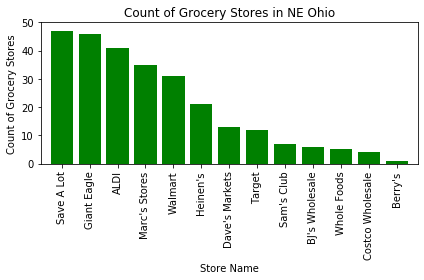

In [134]:
# Create bar chart of grocery stores and warehouse clubs
x_axis = np.arange(len(store_counts))
plt.bar(x_axis,store_counts,color='g',align='center')

# Set limits of chart
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0,50)

# Set up x-axis tick marks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,x_labels,rotation=90) 

# Enter title and labels
plt.title("Count of Grocery Stores in NE Ohio")
plt.xlabel("Store Name")
plt.ylabel("Count of Grocery Stores")

plt.tight_layout()
plt.savefig("store_count_bar_chart.png")
plt.show()

In [135]:
# Create scatter plot of population vs grocery count by county
# Determine store counts by county
store_count_by_cty = complete_df.groupby(['County']).count()
store_count_list = store_count_by_cty['Lat']
store_count_list

County
Ashtabula County      7
Columbiana County     8
Cuyahoga County      80
Geauga County        15
Lake County          26
Lorain County         4
Mahoning County      20
Medina County        12
Portage County       15
Stark County         18
Summit County        51
Trumbull County      13
Name: Lat, dtype: int64

In [136]:
# Hold list of counties needed for later figure
counties = store_count_by_cty.index.to_list()

#Get list of populations by county
pop_list = complete_df['Population'].unique()
cty_list = complete_df['County'].unique()
pop_list_df = pd.DataFrame({
    "Population":pop_list,
    "County": cty_list })
pop_list_sorted = pop_list_df.sort_values(by='County')
pop_list_sorted

,Population,County
4,"98,136",Ashtabula County
11,"104,003",Columbiana County
1,"1,253,783",Cuyahoga County
7,"93,961",Geauga County
5,"230,052",Lake County
2,"306,713",Lorain County
3,"231,064",Mahoning County
8,"177,257",Medina County
9,"162,644",Portage County
6,"373,475",Stark County


In [153]:
# Remove commas and convert population column to numeric values
pop_list_sorted['Population'] = pop_list_sorted['Population'].str.replace(',', '') #.astype(float)
pop_list_num = pd.to_numeric(pop_list_sorted["Population"])
pop_list_num

4       98136
11     104003
1     1253783
7       93961
5      230052
2      306713
3      231064
8      177257
9      162644
6      373475
0      541810
10     201794
Name: Population, dtype: int64

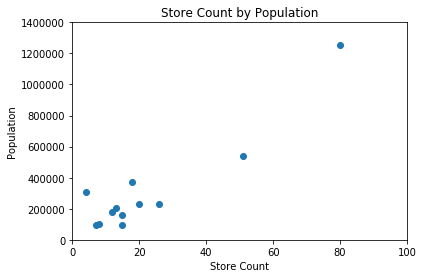

In [154]:
# Set up scatter plot
plt.xlim(0,100)
plt.ylim(0,1400000)
plt.scatter(store_count_list,pop_list_num,marker='o')
plt.title("Store Count by Population")
plt.xlabel("Store Count")
plt.ylabel("Population")

# Save figure 
plt.savefig("store_count_vs_population.png")
plt.show()

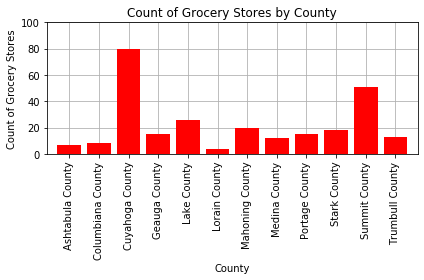

In [160]:
# Set up bar chart for store count by county
x_labels2 = store_count_list.index.to_list()
x_axis = np.arange(len(counties))
plt.bar(x_axis,store_count_list,color='r',align='center',zorder=3)

# Set limits of chart
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0,100)

# Set up x-axis tick marks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,x_labels2,rotation=90) 

# Enter title and labels
plt.title("Count of Grocery Stores by County")
plt.xlabel("County")
plt.ylabel("Count of Grocery Stores")

plt.tight_layout()
plt.savefig("store_count_by_county.png")
#plt.grid()
plt.grid(zorder=0)
plt.show()